# Models


### Import libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../data')
from process_data import process_data
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [13]:
#pull in train and test datasets
X_train, y_train,X_test,y_test = process_data(buckets = 10)

### Baseline Model

Find the most common bucket and make that the (constant) prediction.


In [14]:
most_common_bucket = y_train.iloc[:,0].value_counts().sort_values(ascending =False).index[0]

In [15]:
most_common_bucket_array = np.full(len(y_test),most_common_bucket)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
          10       0.00      0.00      0.00        44
          20       0.00      0.00      0.00        58
          30       0.07      1.00      0.13        32
          40       0.00      0.00      0.00        54
          50       0.00      0.00      0.00        35
          60       0.00      0.00      0.00        40
          70       0.00      0.00      0.00        57
          80       0.00      0.00      0.00        44
          90       0.00      0.00      0.00        50

    accuracy                           0.07       465
   macro avg       0.01      0.10      0.01       465
weighted avg       0.00      0.07      0.01       465

Confusion Matrix:



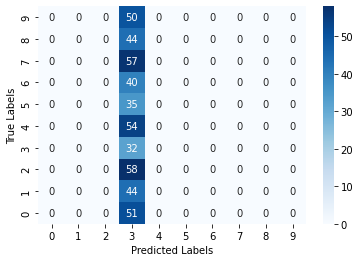

In [30]:
cm = confusion_matrix(y_test, most_common_bucket_array)
cr = classification_report(y_test, most_common_bucket_array)

print("Classification Report:\n", cr)

print("Confusion Matrix:\n")
# Plot confusion matrix with axis labels
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.invert_yaxis()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Model: Logistic Regression

In [17]:
X_train = X_train.drop(columns=X_train.select_dtypes(include=['object','datetime64[ns, UTC]']).columns)
X_test = X_test.drop(columns=X_test.select_dtypes(include=['object','datetime64[ns, UTC]']).columns)

In [18]:
y_train['views_category_10']

2316    60
406     30
645     70
1206    90
592     70
        ..
1095    10
1462    30
2197    30
1039     0
1147    30
Name: views_category_10, Length: 1859, dtype: category
Categories (10, int64): [0 < 10 < 20 < 30 ... 60 < 70 < 80 < 90]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.02      0.04        51
          10       0.00      0.00      0.00        44
          20       0.12      0.02      0.03        58
          30       0.07      0.19      0.11        32
          40       0.00      0.00      0.00        54
          50       0.05      0.14      0.07        35
          60       0.14      0.17      0.16        40
          70       0.06      0.04      0.04        57
          80       0.22      0.05      0.08        44
          90       0.14      0.50      0.21        50

    accuracy                           0.11       465
   macro avg       0.13      0.11      0.07       465
weighted avg       0.13      0.11      0.07       465

Confusion Matrix:



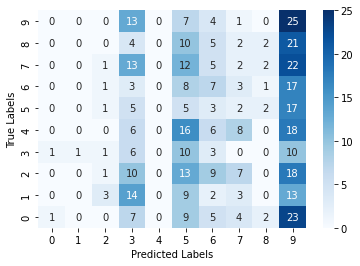

In [36]:
# Instantiate the model with default hyperparameters
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model on the training data
logreg.fit(X_train, y_train['views_category_10'])

# Make predictions on the test data
y_pred = logreg.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Classification Report:\n", cr)

print("Confusion Matrix:\n")
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.invert_yaxis()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



### Model: Gradient Boosted Decision Trees


Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.73      0.69        51
          10       0.25      0.39      0.30        44
          20       0.22      0.16      0.18        58
          30       0.24      0.28      0.26        32
          40       0.43      0.24      0.31        54
          50       0.16      0.23      0.19        35
          60       0.16      0.17      0.17        40
          70       0.41      0.26      0.32        57
          80       0.46      0.57      0.51        44
          90       0.67      0.62      0.65        50

    accuracy                           0.37       465
   macro avg       0.37      0.36      0.36       465
weighted avg       0.38      0.37      0.37       465

Confusion Matrix:



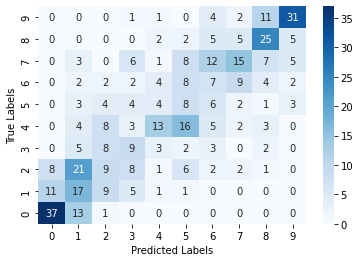

In [37]:


# Instantiate the model with default hyperparameters
gbc = GradientBoostingClassifier()

# Train the model on the training data
gbc.fit(X_train, y_train['views_category_10'])

# Make predictions on the test data
y_pred = gbc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Classification Report:\n", cr)

print("Confusion Matrix:\n")
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.invert_yaxis()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Model: Random Forest
This model was optimized using TPOT, an AutoML library.

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69        51
          10       0.29      0.43      0.35        44
          20       0.16      0.09      0.11        58
          30       0.17      0.25      0.21        32
          40       0.28      0.19      0.22        54
          50       0.15      0.23      0.18        35
          60       0.24      0.20      0.22        40
          70       0.39      0.28      0.33        57
          80       0.47      0.59      0.53        44
          90       0.71      0.64      0.67        50

    accuracy                           0.37       465
   macro avg       0.35      0.36      0.35       465
weighted avg       0.36      0.37      0.36       465

Confusion Matrix:



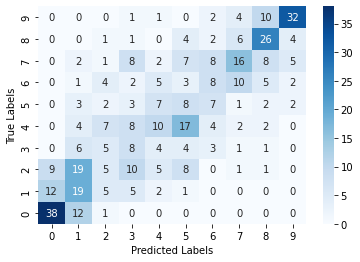

In [39]:

# Instantiate the model with default hyperparameters
rfc = RandomForestClassifier()

# Train the model on the training data
rfc.fit(X_train, y_train['views_category_10'])

# Make predictions on the test data
y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Classification Report:\n", cr)

print("Confusion Matrix:\n")
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.invert_yaxis()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()